In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv(r"C:\Users\91623\Downloads\AirPassengers.csv",index_col='Month')

In [3]:
df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [5]:
train=df[:132]
test=df[132:]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [7]:
n_input=12
n_features=1

In [8]:
train_generator=TimeseriesGenerator(scaled_train,
                                     scaled_train,
                                      n_input,
                                      batch_size=1)

In [9]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_generator,epochs=30)

Epoch 1/30
120/120 [==============================] - 19s 25ms/step - loss: 0.0350
Epoch 2/30
120/120 [==============================] - 3s 21ms/step - loss: 0.0150
Epoch 3/30
120/120 [==============================] - 3s 26ms/step - loss: 0.0099
Epoch 4/30
120/120 [==============================] - 3s 24ms/step - loss: 0.0132
Epoch 5/30
120/120 [==============================] - 3s 22ms/step - loss: 0.0094
Epoch 6/30
120/120 [==============================] - 3s 21ms/step - loss: 0.0103
Epoch 7/30
120/120 [==============================] - 2s 19ms/step - loss: 0.0102
Epoch 8/30
120/120 [==============================] - 2s 16ms/step - loss: 0.0078
Epoch 9/30
120/120 [==============================] - 3s 23ms/step - loss: 0.0074
Epoch 10/30
120/120 [==============================] - 2s 20ms/step - loss: 0.0084
Epoch 11/30
120/120 [==============================] - 2s 20ms/step - loss: 0.0075
Epoch 12/30
120/120 [==============================] - 2s 19ms/step - loss: 0.0050
Epoch 13/30


In [13]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 41ms/step


In [14]:
test_predictions

[array([0.5500329], dtype=float32),
 array([0.5620776], dtype=float32),
 array([0.65823776], dtype=float32),
 array([0.6585381], dtype=float32),
 array([0.76478815], dtype=float32),
 array([0.943348], dtype=float32),
 array([1.0543703], dtype=float32),
 array([1.0000694], dtype=float32),
 array([0.8010575], dtype=float32),
 array([0.66137767], dtype=float32),
 array([0.6060817], dtype=float32),
 array([0.6457687], dtype=float32)]

In [15]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[354.26497573],
       [359.74529976],
       [403.49817866],
       [403.63483691],
       [451.97860861],
       [533.22333568],
       [583.73847926],
       [559.03156781],
       [468.48117048],
       [404.92683911],
       [379.7671845 ],
       [397.82475942]])

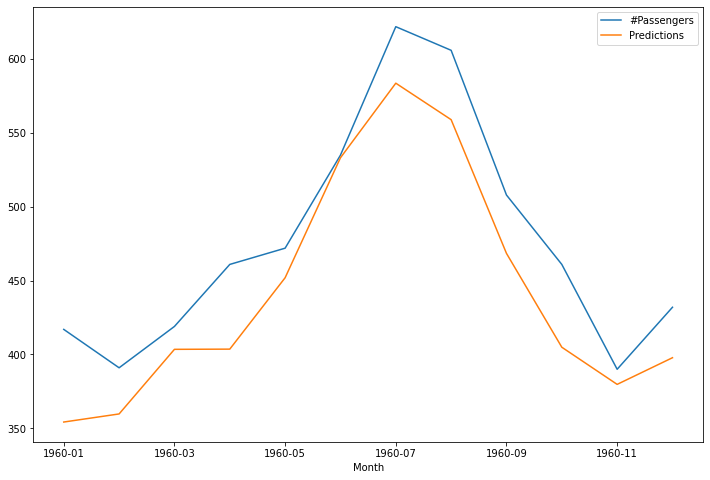

In [16]:
test['Predictions'] = actual_predictions
test.plot(figsize=(12,8));

https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb